# <p style="text-align: center;">EE 380L: Data Mining</p>
# <p style="text-align: center;">Assignment 1</p>
## <p style="text-align: center;">Total points: 100</p>
## <p style="text-align: center;">Due: Tuesday, February 19 submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**.   

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please re download from canvas after submission and make sure all attached images render without errors. (Hint: Image module from IPython.display)**

In this assignment, we will be exploring 4 main problems and a subjective question. 
1. Data exploration and visualization (20 points)
2. Data pre-processing (25 points)
3. Feature extraction (20 points)
4. A problem on k-NN (25 points)
5. ML lifecycle (10 points)

For each of the main problem, you would be generating images to understand the embedded pattern in data and visualise how a classifier would make decisions based on that data. 

The starter code to load the wine quality dataset is given to you. All the packages you would need for this assignment are provided below and please refrain from using any other packages. If you find it necessary to use other packages, please post a question on Piazza or contact the TA. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import soundfile as sf
# My imports
import random
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

def get_bins(data):
	return np.arange(data.min(), data.max() + 1.5) - 0.5

def format_features(data):
	for feature in data:
		temp = feature.replace(' ', '_')
		data.rename(columns=({feature:temp}), inplace = True)

def array_features(data):
	arr = []
	arr.append(data.fixed_acidity)
	arr.append(data.volatile_acidity)
	arr.append(data.citric_acid)
	arr.append(data.residual_sugar)
	arr.append(data.chlorides)
	arr.append(data.free_sulfur_dioxide)
	arr.append(data.total_sulfur_dioxide)
	arr.append(data.density)
	arr.append(data.pH)
	arr.append(data.sulphates)
	arr.append(data.alcohol)
	arr.append(data.quality)
	return arr

def scatter_sub(arr, title, color):
	last = len(arr) - 1
	for i in range(0, last):
		plt.subplot(4, 3, i+1)
		plt.scatter(arr[last], arr[i], color = color)
		temp = arr[i].name.replace('_', ' ').title()
		plt.ylabel(str(temp))
		plt.xlabel('Quality')
	plt.tight_layout(pad=0.5)
	plt.title(title, fontsize=16, x = 1.3, y = -1.5);

def box_plot(data, by, column, title, index):
	axes = plt.subplot(2, 2, index)
	data.boxplot(by = by, column = [column], ax = axes, grid = False)
	axes.set_title(title + ' - ' + column)
	if data.quality[1] == df_red.quality[1]:
		axes.set_facecolor('#ff8080')
	else:
		axes.set_facecolor(white_color)

def outliers_to_nan(data):
	for column in data:
		if column != 'quality':
			mean = data[column].mean()
			std = data[column].std()
			lower = mean - 2*std
			upper = mean + 2*std
			for item in data[column]:
				if item < lower or item > upper:
					data[column].replace(to_replace=item, value=np.nan, inplace=True)
	return data

def replace_nan(raw_data, data, operation):
	if operation is 'mean':
		for column in data:
			if column != 'quality':
				swap = raw_data[column].mean()
				for item in data[column]:
					if np.isnan(item):
						data[column].replace(to_replace=item, value=swap, inplace=True)
	elif operation is 'median':
		for column in data:
			if column != 'quality':
				swap = raw_data[column].median()
				for item in data[column]:
					if np.isnan(item):
						data[column].replace(to_replace=item, value=swap, inplace=True)
	else:
		print('ERROR at replace_nan function')
	return data

def get_min_sample_size(data):
	low_count = 0
	medium_count = 0
	high_count = 0
	for item in data['quality']:
		if item == 'low':
			low_count+=1
		elif item == 'medium':
			medium_count+=1
		elif item == 'high':
			high_count+=1
	counts = [low_count, medium_count, high_count]
	return min(counts)

def draw_indexes(arr, deck_size):
	indexes_selected = []
	for turn in range(0, deck_size):
		value_chosen = random.choice(arr)
		indexes_selected.append(value_chosen)
		arr.pop(arr.index(value_chosen))
	return indexes_selected

def create_df(data, low_indexes, medium_indexes, high_indexes, columns):
	new_df = pd.DataFrame(columns=columns)
	for i in range(0, len(low_indexes)):
		new_df = new_df.append(data.loc[low_indexes[i]])
		new_df = new_df.append(data.loc[medium_indexes[i]])
		new_df = new_df.append(data.loc[high_indexes[i]])
	new_df.reset_index(inplace = True)
	new_df = new_df.drop(columns=['index'])
	return new_df

def get_k_NN_score(data, normalize_flag=False):
	if normalize_flag:
		X_temp = data.drop(columns=['quality']).values
		min_max_scaler = preprocessing.MinMaxScaler()
		X_temp_scaled = min_max_scaler.fit_transform(X_temp)
		X = pd.DataFrame(X_temp_scaled)
	else:
		X = data.drop(columns=['quality'])
	y = data['quality'].values
	X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
	knn = KNeighborsClassifier(n_neighbors = 5)
	knn.fit(X_train,y_train)
	return knn.score(X_test, y_test)

def decision_boundary(data, n_neighbors, wine_type=''):
	if wine_type == 'red':
		X = data.drop(columns=['quality', 'fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH'])
	elif wine_type == 'white':
		X = data.drop(columns=['quality', 'fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'sulphates'])
	else:
		print('ERROR in wine_type field of get_accurate_k_NN_score')
	# Next 3 lines are prone to error
	data['quality'].replace(to_replace='low', value=1, inplace=True)
	data['quality'].replace(to_replace='medium', value=2, inplace=True)
	data['quality'].replace(to_replace='high', value=3, inplace=True)
	y = data['quality'].values
	h = 0.2
	# Create color maps
	cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
	cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])
	flag = True
	for weights in ['uniform', 'distance']:
	    # we create an instance of Neighbours Classifier and fit the data.
	    clf = KNeighborsClassifier(n_neighbors = n_neighbors, weights=weights)
	    clf.fit(X, y)
	    # Plot the decision boundary. For that, we will assign a color to each
	    # point in the mesh [x_min, x_max]x[y_min, y_max].
	    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
	    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
	    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
	                         np.arange(y_min, y_max, h))
	    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
	    # Put the result into a color plot
	    Z = Z.reshape(xx.shape)
	    if flag:
	    	plt.figure(figsize=(12, 7))
	    	plt.subplot(211)
	    	flag = False
	    else:
	    	plt.subplot(212)
	    	plt.tight_layout(pad=3.0)
	    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
	    # Plot also the training points
	    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold,
	                edgecolor='k', s=20)
	    plt.xlim(xx.min(), xx.max())
	    plt.ylim(yy.min(), yy.max())
	    plt.title("%s wine : 3-Class classification (k = %i, weights = '%s')" % (wine_type.capitalize(), n_neighbors, weights))

df_red = pd.read_csv("winequality-red.csv", sep=';')
df_white = pd.read_csv("winequality-white.csv", sep=';')

red_color = "#c81912"
white_color = "#e0bb20"

format_features(df_red)
format_features(df_white)

arr_red = array_features(df_red)
arr_white = array_features(df_white)

# 1.1. Plot the histogram of the quality score for:

1.1.a. red wine

1.1.b. white wine 

1.1.c. Identify the total number of samples in each dataset. 

1.1.d. Plot the histogram of both the 'quality' data in the same graph. 

1.1.e. Plot the histogram of both the 'quality' data in the same graph after normalization. From the plot, determine the wine that is better in quality and explain. (Hint: Consider normalizing the number of samples across bins. That way, it will be easier to compare the quality of red wine and white wine since they have unequal samples.)

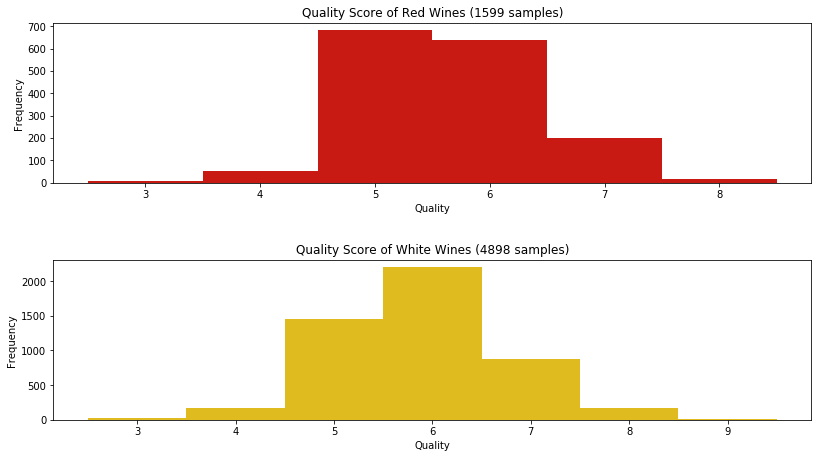

In [2]:
# 1.1.a. - 1.1.b
plt.figure(figsize=(12, 7))
# Plot the histogram of the quality score for red wine.
plt.subplot(211)
plt.hist(df_red.quality, bins = get_bins(df_red.quality), color = red_color)
plt.ylabel('Frequency')
plt.xlabel('Quality')
plt.title('Quality Score of Red Wines (' + str(len(df_red.quality)) + ' samples)')

# Plot the histogram of the quality score for white wine.
plt.subplot(212)
plt.hist(df_white.quality, bins = get_bins(df_white.quality), color = white_color)
plt.ylabel('Frequency')
plt.xlabel('Quality')
plt.title('Quality Score of White Wines (' + str(len(df_white.quality)) + ' samples)')

# Specify the padding for the subplot
plt.tight_layout(pad=3.0)

In [3]:
print('1.1.c')
print('There are ' + str(len(df_red.quality)) + ' red wine samples.')
print('There are ' + str(len(df_white.quality)) + ' white wine samples.')

1.1.c
There are 1599 red wine samples.
There are 4898 white wine samples.


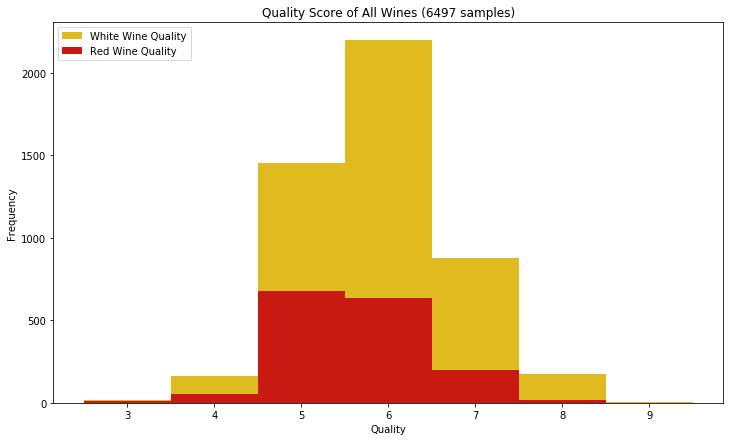

In [4]:
#1.1.d
# Plot the histogram of both the 'quality' data in the same graph.
plt.figure(figsize=(12, 7))
plt.hist(df_white.quality, bins = get_bins(df_white.quality), color = white_color, label = 'White Wine Quality')
plt.hist(df_red.quality, bins = get_bins(df_red.quality), color = red_color, label = 'Red Wine Quality')
plt.ylabel('Frequency')
plt.xlabel('Quality')
plt.title('Quality Score of All Wines (' + str(len(df_white.quality) + len(df_red.quality)) + ' samples)')
plt.legend(loc="upper left")

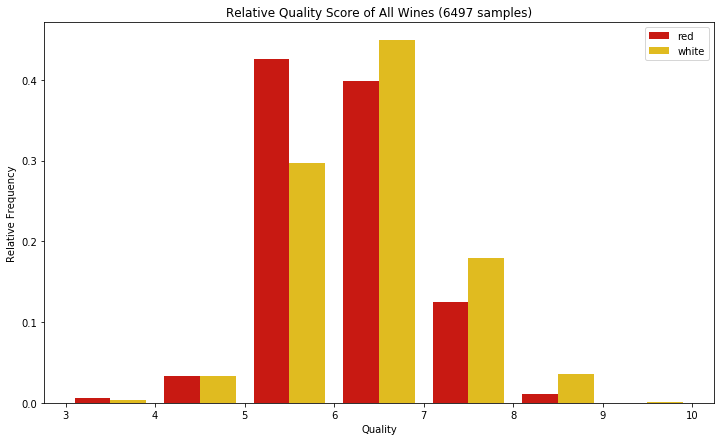

In [5]:
#1.1.e
# Normalizing the quality scores
plt.figure(figsize=(12, 7))
plt.hist([df_red['quality'], df_white['quality']], color = [red_color, white_color], bins = range(3, 11), density=True, label=['red', 'white'])
plt.ylabel('Relative Frequency')
plt.xlabel('Quality')
plt.title('Relative Quality Score of All Wines (' + str(len(df_white.quality) + len(df_red.quality)) + ' samples)')
plt.legend(loc="upper right")

# 1.2. In this part, we will determine the correlation between quality and features. This exercise will help in feature selection in the event of limited data availability. 
Do this separately for red and white wine. 

1.2.a. The resulting correlation plot should be (12x12) matrix. 

1.2.b. You will notice that the diagonal elements would always correlate with a score of 1. Explain the reason. 

1.2.c. List the top 5 features with maximum correlation for quality. 

1.2.d. List two features for each data with positive and negative correlation. 


1.2.b The diagonal elements have a correlation of 1 because they
represent identical features being correlated.


1.2.c Top 5 features with maximum correlation for quality:
Red Wine:
	-Alcohol
	-Sulphates
	-Citric Acid
	-Fixed Acidity
	-Residual Sugar

White Wine:
	-Alcohol
	-pH
	-Sulphates
	-Free Sulfur Dioxide
	-Citric Acid


1.2.d Two features for each data with positive and negative correlation
For Red Wine:
	-Volatile Acidity
	-Total Sulfur Dioxide

For White Wine:
	-Density
	-Chlorides


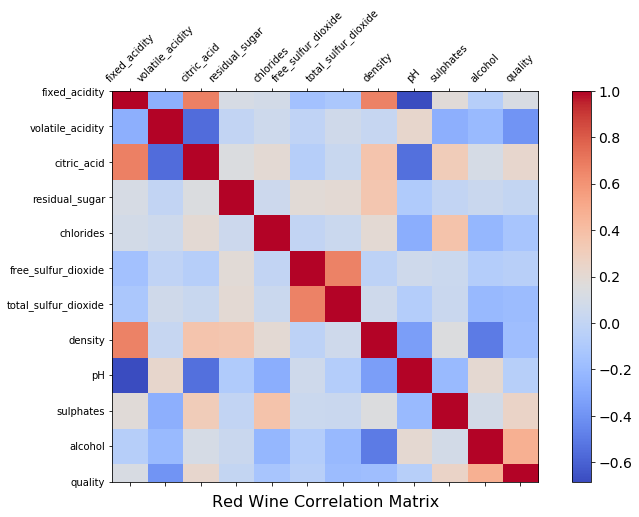

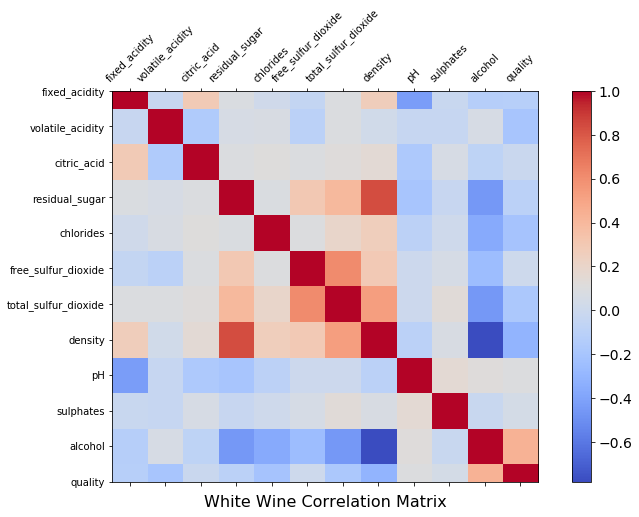

In [6]:
f = plt.figure(figsize=(12, 7))
plt.matshow(df_red.corr(), fignum=f.number, cmap = 'coolwarm')
plt.xticks(range(df_red.shape[1]), df_red.columns, fontsize=10, rotation=45)
plt.yticks(range(df_red.shape[1]), df_red.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Red Wine Correlation Matrix', fontsize=16, y=-0.08);

f = plt.figure(figsize=(12, 7))
plt.matshow(df_white.corr(), fignum=f.number, cmap = 'coolwarm')
plt.xticks(range(df_white.shape[1]), df_white.columns, fontsize=10, rotation=45)
plt.yticks(range(df_white.shape[1]), df_white.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('White Wine Correlation Matrix', fontsize=16, y=-0.08);

print('1.2.b The diagonal elements have a correlation of 1 because they')
print('represent identical features being correlated.')

print('\n\n1.2.c Top 5 features with maximum correlation for quality:')
print('Red Wine:')
print('\t-Alcohol')
print('\t-Sulphates')
print('\t-Citric Acid')
print('\t-Fixed Acidity')
print('\t-Residual Sugar')

print('\nWhite Wine:')
print('\t-Alcohol')
print('\t-pH')
print('\t-Sulphates')
print('\t-Free Sulfur Dioxide')
print('\t-Citric Acid')

print('\n\n1.2.d Two features for each data with positive and negative correlation')
print('For Red Wine:')
print('\t-Volatile Acidity')
print('\t-Total Sulfur Dioxide')

print('\nFor White Wine:')
print('\t-Density')
print('\t-Chlorides')

# 1.3. Plot the scatter plot for 'features vs. quality' for red and white wine.
1.3.a. Plot 11 figures with 'each feature vs. quality' for red and white wine. 

1.3.b. For the top two features with positive correlation from the 1.2, do you observe a similar trend in the scatter plot? 

1.3.c. For the top two negatively correlated features from 1.2, do you observe a similar trend in the scatter plot?
If not, why is there a disparity based on the figures? 

1.3.b
Yes, there is a similar trend in the scatter plot for the top 2 features with positive correlation from 1.2.

1.3.c
Yes, there is a similar trend in the scatter plot for the top 2 features with negative correlation from 1.2.



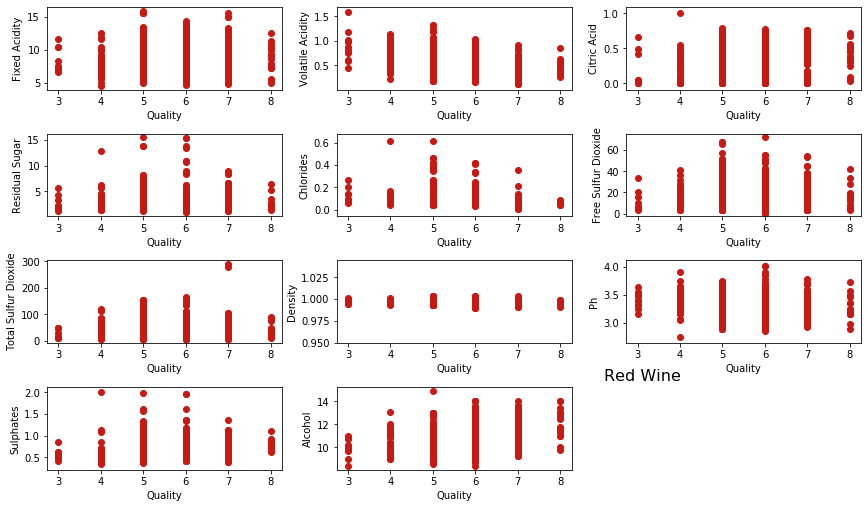

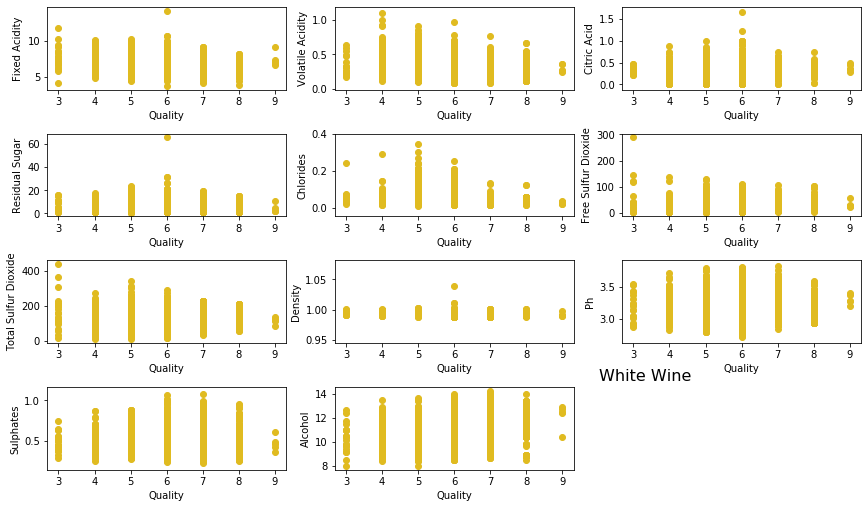

In [7]:
#1.3.a
plt.figure(figsize=(12, 7))
scatter_sub(arr_red, 'Red Wine', red_color)
plt.figure(figsize=(12, 7))
scatter_sub(arr_white, 'White Wine', white_color)

#1.3.b
print('1.3.b')
print('Yes, there is a similar trend in the scatter plot for the top 2 features with positive correlation from 1.2.')
print('')

#1.3.c
print('1.3.c')
print('Yes, there is a similar trend in the scatter plot for the top 2 features with negative correlation from 1.2.')
print('')

# 1.4. Plot the box plot to identify the total number of outlier for top two positive and negatively correlated features 
1.4.a. For red wine data (4 box plots)

1.4.b. For white wine data (4 box plots)

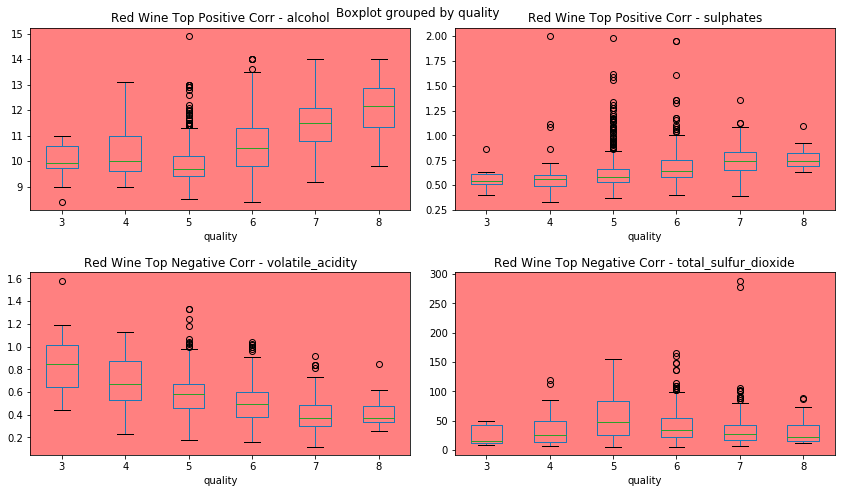

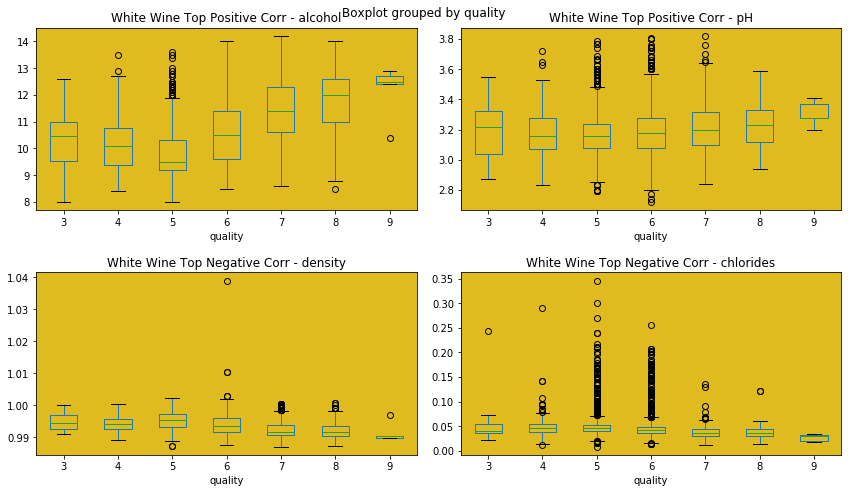

In [8]:
plt.figure(figsize=(12, 7))
box_plot(df_red, 'quality', 'alcohol', 'Red Wine Top Positive Corr', 1)
box_plot(df_red, 'quality', 'sulphates', 'Red Wine Top Positive Corr', 2)
box_plot(df_red, 'quality', 'volatile_acidity', 'Red Wine Top Negative Corr', 3)
box_plot(df_red, 'quality', 'total_sulfur_dioxide', 'Red Wine Top Negative Corr', 4)
plt.tight_layout(pad=1.5)

plt.figure(figsize=(12, 7))
box_plot(df_white, 'quality', 'alcohol', 'White Wine Top Positive Corr', 1)
box_plot(df_white, 'quality', 'pH', 'White Wine Top Positive Corr', 2)
box_plot(df_white, 'quality', 'density', 'White Wine Top Negative Corr', 3)
box_plot(df_white, 'quality', 'chlorides', 'White Wine Top Negative Corr', 4)
plt.tight_layout(pad=1.5)

# 2. In this question we will explore data pre-processing: missing values, normalization
2.1.a. Write the code to replace outliers of each feature with NaN. (2 sigma deviation can be used) 

2.1.b. write the code to replace the missing values with mean, median, forward and backward values. Save these as separate dataframes since we would use them again in the last question. 

2.1.c. What is data normalization and how did normalization help in identifying the white wine vs. red wine quality from 1.1.e?

In [9]:
#2.1.a - Replacing the outliers of each feature with NaN
df_red_NaN = outliers_to_nan(df_red.copy())
df_white_NaN = outliers_to_nan(df_white.copy())

#2.1.b - Replacing NaN values with mean, median, foward and backward values.
df_red_mean = replace_nan(df_red, df_red_NaN.copy(), 'mean')
df_red_median = replace_nan(df_red, df_red_NaN.copy(), 'median')
df_red_forward = df_red_NaN.fillna(method='ffill')
df_red_backward = df_red_NaN.fillna(method='bfill')

df_white_mean = replace_nan(df_white, df_white_NaN.copy(), 'mean')
df_white_median = replace_nan(df_white, df_white_NaN.copy(), 'median')
df_white_forward = df_white_NaN.fillna(method='ffill')
df_white_backward = df_white_NaN.fillna(method='bfill')

#2.1.c
print('2.1.c')
print('Data normalization is the process of expressing data in proportions, rather than occurrences.')
print('This helped us determine the white wine vs red wine quality in 1.1.e, because instead of considering the')
print('raw number (or frequency) of wines in each quality, we considered the percentage (or relative frequency) of')
print('wines in each quality.')
print('This gave us a more realistic insight on the actual quality of each wine, without the sample size biasing')
print('our observations.')

2.1.c
Data normalization is the process of expressing data in proportions, rather than occurrences.
This helped us determine the white wine vs red wine quality in 1.1.e, because instead of considering the
raw number (or frequency) of wines in each quality, we considered the percentage (or relative frequency) of
wines in each quality.
This gave us a more realistic insight on the actual quality of each wine, without the sample size biasing
our observations.


# 3. Feature extraction: 
In this question, we will take a quick detour to extract spectrogram features from two audio files. 
The started code to load the audio data is provided in this exercise. 

3.1.a. Plot the time vs. amplitude plot of the audio signal. 

3.1.b. Plot the spectrogram for both the audio files. 

3.1.c. Explain the algorithm used to extract the spectrogram. What does the information on the spectogram signify? 


2.1.c
The spectrogram represents a change in frequency of the signal over time.
It is a moving average of the Fourier Transform of the signal.


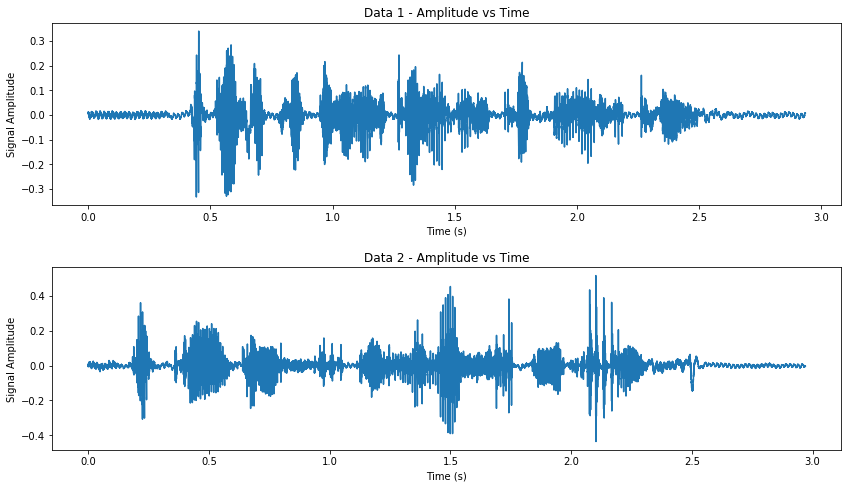

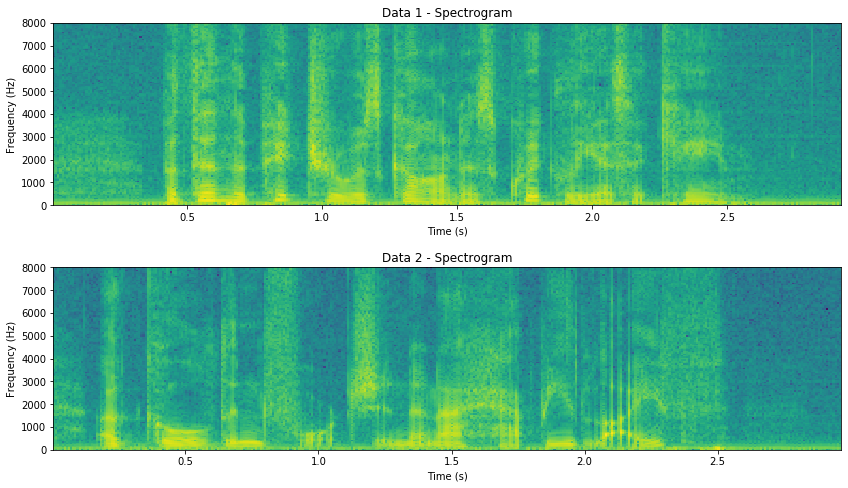

In [10]:
data1, samplerate1 = sf.read("61-70968-0006.flac") 
data2, samplerate2 = sf.read("61-70968-0002.flac")
time_1 = []
time_2 = []
for i in range(0, len(data1)):
	time_1.append(i/samplerate1)
for i in range(0, len(data2)):
	time_2.append(i/samplerate2)
plt.figure(figsize=(12, 7))
plt.subplot(2, 1, 1)
plt.plot(time_1, data1)
plt.xlabel('Time (s)')
plt.ylabel('Signal Amplitude')
plt.title('Data 1 - Amplitude vs Time')
plt.subplot(2, 1, 2)
plt.plot(time_2, data2)
plt.xlabel('Time (s)')
plt.ylabel('Signal Amplitude')
plt.title('Data 2 - Amplitude vs Time')
plt.tight_layout(pad=1.5)

plt.figure(figsize=(12, 7))
plt.subplot(2, 1, 1)
plt.specgram(data1, Fs=samplerate1)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Data 1 - Spectrogram')
plt.subplot(2, 1, 2)
plt.specgram(data2, Fs=samplerate2)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Data 2 - Spectrogram')
plt.tight_layout(pad=1.5)

# 2.1.c
print('2.1.c')
print('The spectrogram represents a change in frequency of the signal over time.')
print('It is a moving average of the Fourier Transform of the signal.')

# 4. Going back to the wine dataset, we will convert the quality index to categories corresponding to ['low, 'medium', 'high'] and create a k-NN classifier to classify the wine dataset into one of these categories based on features. 
4.1.a. Write the code to convert rating between 0 to 3.5 as low, 3.5 to 7 as medium and 7 to 10 as high. 

4.1.b. Identify the total number of samples for each class and randomly select the same number of samples from the other classes (That is, if there are 65 samples of 'high' quality, randomly pick 65 samples from 'medium' and 65 samples from 'low' and use that to split into train and test)

4.1.c. create a k-NN classifier and report the accuracy using the data from 2.1.b. Report the accuracy in each case.  

4.1.d. create a k-NN classifier, preprocess the input feature using standard scalar to normalize and report the accuracy using the data from 2.1.b. Do you see a difference in accuracy? If yes, explain the reason. 

4.1.e. For a k-NN classifier with the above data, report the accuracy. Plot the prediciton along with the decision boundaries. (Hint: You cannot use all the features and you would have to pick 2 features. Explain the reason behind the choice of those features) 

#4.1.c
Mean accuracy for red wine: 0.47368421052631576
Median accuracy for red wine: 0.42105263157894735
Forward accuracy for red wine: 0.4473684210526316
Backward accuracy for red wine: 0.4473684210526316

Mean accuracy for white wine: 0.4636363636363636
Median accuracy for white wine: 0.4727272727272727
Forward accuracy for white wine: 0.4909090909090909
Backward accuracy for white wine: 0.4818181818181818


#4.1.d
Normalized mean accuracy for red wine: 0.6052631578947368
Normalized median accuracy for red wine: 0.5789473684210527
Normalized forward accuracy for red wine: 0.631578947368421
Normalized backward accuracy for red wine: 0.5263157894736842

Normalized mean accuracy for white wine: 0.5454545454545454
Normalized median accuracy for white wine: 0.5545454545454546
Normalized forward accuracy for white wine: 0.5818181818181818
Normalized backward accuracy for white wine: 0.5454545454545454


There is a difference in accuracy: the accuracy of the normalized data is higher. This 

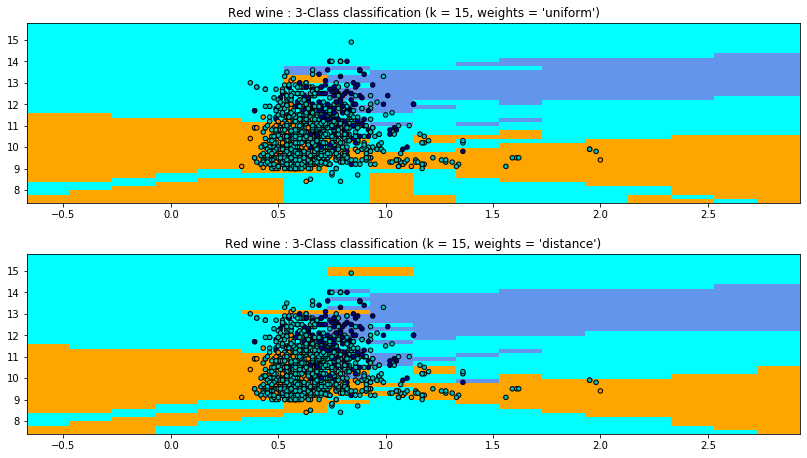

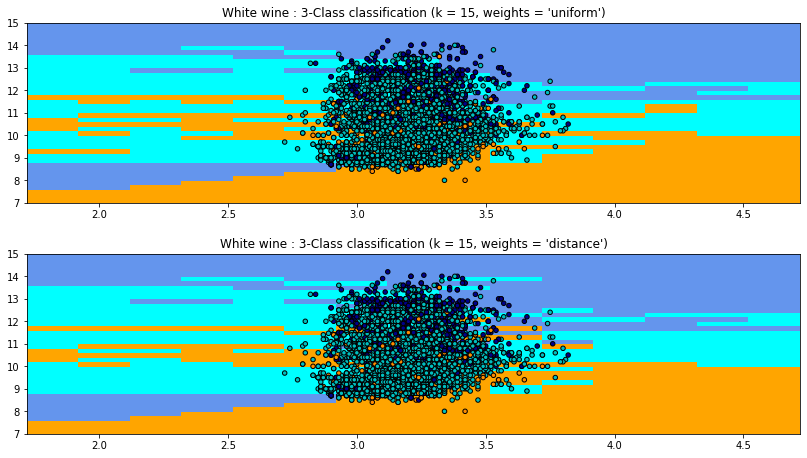

In [11]:
# 4.1.a 0-5, then 5-7, then 7-10

# 4.1.e Alcohol and sulfates/volatile_acidity
#4.1.a
for i in range (0, 11):
	if i < 5:
		value = 'low'
	elif i >= 5 and i < 7:
		value = 'medium'
	elif i >= 7:
		value = 'high'
	df_red_mean['quality'].replace(to_replace=i, value=value, inplace=True)
	df_red_median['quality'].replace(to_replace=i, value=value, inplace=True)
	df_red_forward ['quality'].replace(to_replace=i, value=value, inplace=True)
	df_red_backward['quality'].replace(to_replace=i, value=value, inplace=True)
	df_white_mean['quality'].replace(to_replace=i, value=value, inplace=True)
	df_white_median['quality'].replace(to_replace=i, value=value, inplace=True)
	df_white_forward ['quality'].replace(to_replace=i, value=value, inplace=True)
	df_white_backward['quality'].replace(to_replace=i, value=value, inplace=True)

#4.1.b
# Get all indexes of each category
all_lows_red = df_red_mean.index[df_red_mean['quality']=='low'].tolist()
all_mediums_red = df_red_mean.index[df_red_mean['quality']=='medium'].tolist()
all_highs_red = df_red_mean.index[df_red_mean['quality']=='high'].tolist()

all_lows_white = df_white_mean.index[df_white_mean['quality']=='low'].tolist()
all_mediums_white = df_white_mean.index[df_white_mean['quality']=='medium'].tolist()
all_highs_white = df_white_mean.index[df_white_mean['quality']=='high'].tolist()

# Get the minimum sample size
min_sample_size_red = get_min_sample_size(df_red_mean)
min_sample_size_white = get_min_sample_size(df_white_mean)

# Randomly select the same number of samples across all classes.
selected_lows_red = draw_indexes(all_lows_red, min_sample_size_red)
selected_mediums_red = draw_indexes(all_mediums_red, min_sample_size_red)
selected_highs_red = draw_indexes(all_highs_red, min_sample_size_red)

selected_lows_white = draw_indexes(all_lows_white, min_sample_size_white)
selected_mediums_white = draw_indexes(all_mediums_white, min_sample_size_white)
selected_highs_white = draw_indexes(all_highs_white, min_sample_size_white)

# Create columns to be passed into the functions of the following lines
columns = []
for column in df_red_mean:
	columns.append(column)

# Create data frames given the randomly selected indexes
selected_red_mean = create_df(df_red_mean, selected_lows_red, selected_mediums_red, selected_highs_red, columns)
selected_red_median = create_df(df_red_median, selected_lows_red, selected_mediums_red, selected_highs_red, columns)
selected_red_forward = create_df(df_red_forward, selected_lows_red, selected_mediums_red, selected_highs_red, columns)
selected_red_backward = create_df(df_red_backward, selected_lows_red, selected_mediums_red, selected_highs_red, columns)

selected_white_mean = create_df(df_white_mean, selected_lows_white, selected_mediums_white, selected_highs_white, columns)
selected_white_median = create_df(df_white_median, selected_lows_white, selected_mediums_white, selected_highs_white, columns)
selected_white_forward = create_df(df_white_forward, selected_lows_white, selected_mediums_white, selected_highs_white, columns)
selected_white_backward = create_df(df_white_backward, selected_lows_white, selected_mediums_white, selected_highs_white, columns)

#4.1.c
kNN_score_red_mean = get_k_NN_score(selected_red_mean)
kNN_score_red_median = get_k_NN_score(selected_red_median)
kNN_score_red_forward = get_k_NN_score(selected_red_forward)
kNN_score_red_backward = get_k_NN_score(selected_red_backward)

kNN_score_white_mean = get_k_NN_score(selected_white_mean)
kNN_score_white_median = get_k_NN_score(selected_white_median)
kNN_score_white_forward = get_k_NN_score(selected_white_forward)
kNN_score_white_backward = get_k_NN_score(selected_white_backward)

print('#4.1.c')
print('Mean accuracy for red wine: ' + str(kNN_score_red_mean))
print('Median accuracy for red wine: ' + str(kNN_score_red_median))
print('Forward accuracy for red wine: ' + str(kNN_score_red_forward))
print('Backward accuracy for red wine: ' + str(kNN_score_red_backward))

print('\nMean accuracy for white wine: ' + str(kNN_score_white_mean))
print('Median accuracy for white wine: ' + str(kNN_score_white_median))
print('Forward accuracy for white wine: ' + str(kNN_score_white_forward))
print('Backward accuracy for white wine: ' + str(kNN_score_white_backward))

#4.1.d
norm_kNN_score_red_mean = get_k_NN_score(selected_red_mean, True)
norm_kNN_score_red_median = get_k_NN_score(selected_red_median, True)
norm_kNN_score_red_forward = get_k_NN_score(selected_red_forward, True)
norm_kNN_score_red_backward = get_k_NN_score(selected_red_backward, True)

norm_kNN_score_white_mean = get_k_NN_score(selected_white_mean, True)
norm_kNN_score_white_median = get_k_NN_score(selected_white_median, True)
norm_kNN_score_white_forward = get_k_NN_score(selected_white_forward, True)
norm_kNN_score_white_backward = get_k_NN_score(selected_white_backward, True)

print('\n\n#4.1.d')
print('Normalized mean accuracy for red wine: ' + str(norm_kNN_score_red_mean))
print('Normalized median accuracy for red wine: ' + str(norm_kNN_score_red_median))
print('Normalized forward accuracy for red wine: ' + str(norm_kNN_score_red_forward))
print('Normalized backward accuracy for red wine: ' + str(norm_kNN_score_red_backward))

print('\nNormalized mean accuracy for white wine: ' + str(norm_kNN_score_white_mean))
print('Normalized median accuracy for white wine: ' + str(norm_kNN_score_white_median))
print('Normalized forward accuracy for white wine: ' + str(norm_kNN_score_white_forward))
print('Normalized backward accuracy for white wine: ' + str(norm_kNN_score_white_backward))

print('\n\nThere is a difference in accuracy: the accuracy of the normalized data is higher. This difference in accuracy')
print('occurs because kNN typically uses euclidian distance to find k nearest points from any given point.')
print('So using normalized features may select a different set of k neighbors than the ones chosen when unnormalized')
print('features were used.')

#4.1.e
decision_boundary(df_red, 15, 'red')
decision_boundary(df_white, 15, 'white')
print('\n\n#4.1.e')
print('I referred to 1.2.c to use the top 2 correlated features for each wine.')
print('Red wine: Alcohol and Sulfates')
print('White wine: Alcohol and pH')
print('I selected those features since they are the most correlated to the quality of the wine.')

# 5. ML lifecycle
During different stages of an ML lifecycle, there is always a fine balance between revisiting feature extraction and model parameter determination based on model verification. From the exercise above, briefly explain why feature extraction and feature selection is important for model performance.
How is model complexity increased for a k-NN and how would that affect the model verification step?

In [12]:
print('#5')
print('Feature extraction and feature selection is important for model performance because extracting the irrelevant')
print('features enables the model to focus on the more relevant selected features. It helps to minimize a search base')
print('and/or to trim down features (combine 2 features into a new feature).')
print('Model complexity is increased for a k-NN because only a limited amount of features can be selected, which affects')
print('the model verification step if the wrong features were selected.')

#5
Feature extraction and feature selection is important for model performance because extracting the irrelevant
features enables the model to focus on the more relevant selected features. It helps to minimize a search base
and/or to trim down features (combine 2 features into a new feature).
Model complexity is increased for a k-NN because only a limited amount of features can be selected, which affects
the model verification step if the wrong features were selected.
